<a href="https://colab.research.google.com/github/Josephnyingi/Financial-Inclusion/blob/main/Joseph_Nyingi_IP2_Core_2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Analysis: Bivariate Analysis

## 1. Defining the Question

### a) Specifying the Data Analytic Question

Which model can we use predict individuals who are most likely to have or use a bank account.

### b) Defining the Metric for Success

The model will be regarded successful if it can effectively predict the individuals who are mostly likely to have or use commercial bank accounts.

### c) Understanding the context 

Financial inclusion means that individuals and businesses have access to useful and affordable financial products and services that meet their needs – transactions, payments, savings, credit and insurance – delivered in a responsible and sustainable way.

Being able to have access to a transaction account is a first step toward broader financial inclusion since a transaction account allows people to store money, and send and receive payments.

Financial Inclusion remains one of the main obstacles to economic and human development in Africa. For example, across Kenya, Rwanda, Tanzania, and Uganda only 9.1 million adults (or 13.9% of the adult population) have access to or use a commercial bank account.

Access to bank accounts enables households to save and facilitate payments while also helping businesses build up their credit-worthiness and improve their access to other financial services. Therefore, access to bank accounts is an essential contributor to long-term economic growth.

In this project will come up with a model which can predict the individuals who are likely to have or access to commercial bank accounts that will help provide an indication of the state of financial inclusion in Kenya, Rwanda, Tanzania, and Uganda, while providing insights into some of the key demographic factors that might drive individuals’ financial outcomes.

### d) Recording the Experimental Design

Below are the steps that will be conducted in this project analysis to answer the research question effectivily.

1.Load data and reading dataset

2.Data Cleaning (check for and deal with outliers, anomalies and missing data)

3.Univariate Analysis

4.Bivariate Analysis

5.Multivariate Analysis

6.Implementing the Solution

7.Challenging the Solution and Follow Up Questions

### e) Data Relevance

The dataset used in the analysis has records of individuals from four East Africa countries; Kenya, Uganda, Tanzania and Rwanda in the year 2016, 2017 and 2018. Some of the information in the dataset include year, has a bank account, type of location, cell phone access, household size, gender, occupation, age, level of education, type of a job and marital status of the individuals. The data was collected from various Finscope surveys available online.

The data is valid and relevant for the analysis and answering the reseach questions for coming up with a model to make predictions of the individuals likely to have or access to bank accounts.

## 2. Reading the Data

In [2]:
# Import the relevant python libraries we going to use
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
# Loading the Data from the source as csv
# Dataset  url = http://bit.ly/FinancialDataset
#
Financial = pd.read_csv ('http://bit.ly/FinancialDataset')
Financial

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4.0,48.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2.0,27.0,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5.0,27.0,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7.0,30.0,Female,Parent,Divorced/Seperated,Secondary education,Self employed


## 3. Checking the Data

In [ ]:
# Determining the size of our dataset
#
print('This dataset has ' + str(Financial.shape[0]) + ' rows, and ' + str(Financial.shape[1]) + ' columns')

This dataset has 23524 rows, and 13 columns


In [ ]:
# Previewing the top of our dataset
#
Financial.head(10)

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed
5,Kenya,2018,uniqueid_6,No,Rural,No,7.0,26.0,Female,Spouse,Married/Living together,Primary education,Informally employed
6,Kenya,2018,uniqueid_7,No,Rural,Yes,7.0,32.0,Female,Spouse,Married/Living together,Primary education,Self employed
7,Kenya,2018,uniqueid_8,No,Rural,Yes,1.0,42.0,Female,Head of Household,Married/Living together,Tertiary education,Formally employed Government
8,Kenya,2018,uniqueid_9,Yes,Rural,Yes,3.0,54.0,Male,Head of Household,Married/Living together,Secondary education,Farming and Fishing
9,Kenya,2018,uniqueid_10,No,Urban,Yes,3.0,76.0,Female,Head of Household,Divorced/Seperated,No formal education,Remittance Dependent


In [ ]:
# or
Financial.shape

(23524, 13)

In [ ]:
# Previewing the bottom of our dataset
# 
Financial.tail()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4.0,48.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2.0,27.0,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5.0,27.0,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7.0,30.0,Female,Parent,Divorced/Seperated,Secondary education,Self employed
23523,Uganda,2018,uniqueid_2117,No,Rural,Yes,10.0,20.0,Male,Child,Single/Never Married,Secondary education,No Income


In [ ]:
# Checking whether each column has an appropriate datatype
#
Financial.dtypes

country                    object
year                        int64
uniqueid                   object
Has a Bank account         object
Type of Location           object
Cell Phone Access          object
household_size            float64
Respondent Age            float64
gender_of_respondent       object
The relathip with head     object
marital_status             object
Level of Educuation        object
Type of Job                object
dtype: object

In [ ]:
# Previewing a sample of the dataset

Financial.sample(n=5)

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
8637,Rwanda,2016,uniqueid_2570,No,Rural,Yes,7.0,30.0,Female,Spouse,Married/Living together,Primary education,Farming and Fishing
6617,Rwanda,2016,uniqueid_550,No,Rural,No,4.0,48.0,Female,Head of Household,Widowed,No formal education,Informally employed
22707,Uganda,2018,uniqueid_1285,No,Urban,Yes,2.0,32.0,Female,Head of Household,Single/Never Married,Primary education,Other Income
12529,Rwanda,2016,uniqueid_6462,No,Rural,Yes,3.0,61.0,Female,Spouse,Married/Living together,Primary education,Farming and Fishing
21902,Uganda,2018,uniqueid_480,No,Rural,Yes,9.0,35.0,Female,Spouse,Married/Living together,Primary education,Self employed


In [ ]:
# Checking the number of unique records in each column
#
Financial.nunique()

country                      4
year                         6
uniqueid                  8735
Has a Bank account           2
Type of Location             2
Cell Phone Access            2
household_size              21
Respondent Age              85
gender_of_respondent         2
The relathip with head       6
marital_status               5
Level of Educuation          7
Type of Job                 10
dtype: int64

In [ ]:
# Checking for null values
#
Financial.isnull().values.any()
# There are null values in the dataset.

True

In [ ]:
# checking total number of null values
Financial.isnull().sum()
# show the sum of null values in each column.

country                   14
year                       0
uniqueid                   0
Has a Bank account        36
Type of Location          15
Cell Phone Access         11
household_size            28
Respondent Age            34
gender_of_respondent      34
The relathip with head     4
marital_status            32
Level of Educuation       29
Type of Job               30
dtype: int64

In [ ]:
# checking for numerical description or Summary statistics of the dataset

Financial.describe(include='all')

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
count,23510,23524.000000,23524,23488,23509,23513,23496.000000,23490.000000,23490,23520,23492,23495,23494
unique,4,NaN,8735,2,2,2,NaN,NaN,2,6,5,7,10
top,Rwanda,NaN,uniqueid_1095,No,Rural,Yes,NaN,NaN,Female,Head of Household,Married/Living together,Primary education,Self employed
freq,8735,NaN,4,20179,14338,17449,NaN,NaN,13859,12829,10739,12775,6428
mean,NaN,2016.979000,NaN,NaN,NaN,NaN,3.681818,38.804300,NaN,NaN,NaN,NaN,NaN
std,NaN,0.899669,NaN,NaN,NaN,NaN,2.279933,16.519996,NaN,NaN,NaN,NaN,NaN
min,NaN,2016.000000,NaN,NaN,NaN,NaN,0.000000,16.000000,NaN,NaN,NaN,NaN,NaN
25%,NaN,2016.000000,NaN,NaN,NaN,NaN,2.000000,26.000000,NaN,NaN,NaN,NaN,NaN
50%,NaN,2017.000000,NaN,NaN,NaN,NaN,3.000000,35.000000,NaN,NaN,NaN,NaN,NaN
75%,NaN,2018.000000,NaN,NaN,NaN,NaN,5.000000,49.000000,NaN,NaN,NaN,NaN,NaN


## 4. External Data Source Validation

Making sure your data matches something outside of the dataset is very important. It allows you to ensure that the measurements are roughly in line with what they should be and it serves as a check on what other things might be wrong in your dataset. External validation can often be as simple as checking your data against a single number, as we will do here.



### a.Validation

## 5. Tidying the Dataset

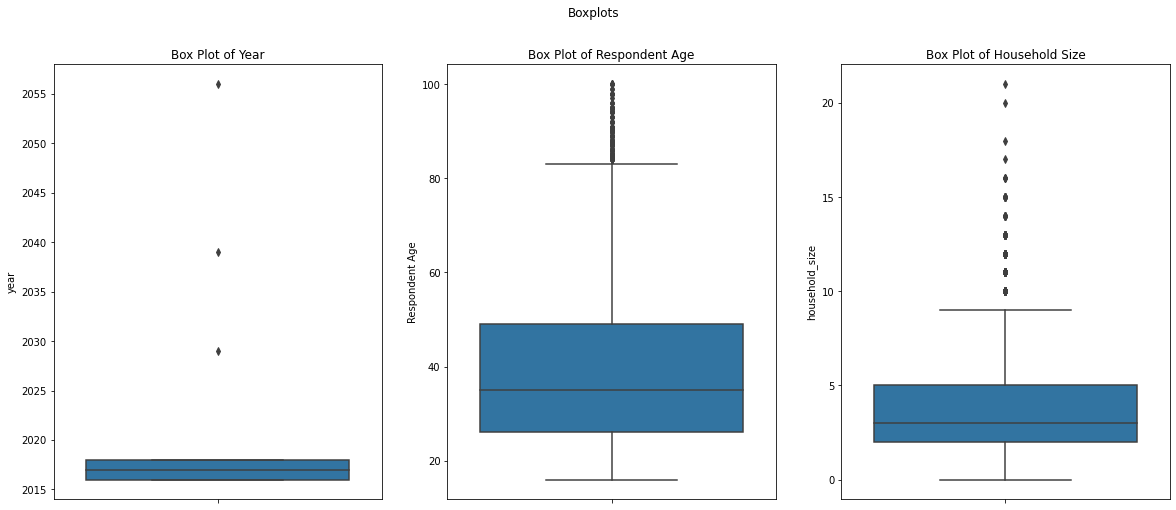

In [ ]:
#Checking for the outliers by use of Box plots
#
fig, ax = plt.subplots(1,3, figsize=(20,8))
fig.suptitle('Boxplots')
sns.boxplot(data=Financial, y = "year", ax=ax[0])
ax[0].set_title('Box Plot of Year')
sns.boxplot(data=Financial, y = "Respondent Age", ax=ax[1])
ax[1].set_title('Box Plot of Respondent Age')
sns.boxplot(data=Financial, y = "household_size", ax=ax[2])
ax[2].set_title('Box Plot of Household Size')
plt.show()
# The Box plot of the year below show that we have three outliers in the 'year' variable,

In [ ]:
# Checking for Anomalies
# 'year' variable

q1_year = Financial['year'].quantile(.25)
q3_year = Financial['year'].quantile(.75)

iqr_year = q3_year - q1_year

# 'respondent_age' variable
#q1_age = Financial['respondent_age'].quantile(.25)
#q3_age = Financial['respondent_age'].quantile(.75)

#iqr_age = q3_age - q1_age

# 'household_size' variable
q1_size = Financial['household_size'].quantile(.25)
q3_size = Financial['household_size'].quantile(.75)

iqr_size = q3_size - q1_size

print(iqr_year, iqr_size) 

2.0 3.0


In [ ]:
# Identifying the Missing Data 
#
Financial.isnull().values.any()
Financial.isnull().sum()

# There are null values in the dataset.

country                   14
year                       0
uniqueid                   0
Has a Bank account        36
Type of Location          15
Cell Phone Access         11
household_size            28
Respondent Age            34
gender_of_respondent      34
The relathip with head     4
marital_status            32
Level of Educuation       29
Type of Job               30
dtype: int64

In [ ]:
# Dealing with the Missing Data
# We checking to the records with the null values
# 'country' variable is null

Financial[Financial['country'].isna()]

# From the dataset we can see that the 'year' variable is 2018.
#  The records taken in 2018 are for Kenya only
# we replace the country variable from Null to Kenya

Financial["country"].fillna("Kenya", inplace = True)


In [ ]:
#Confirming that the 'country' variable no longer has null values
Financial.isnull().sum()

country                    0
year                       0
uniqueid                   0
Has a Bank account        36
Type of Location          15
Cell Phone Access         11
household_size            28
Respondent Age            34
gender_of_respondent      34
The relathip with head     4
marital_status            32
Level of Educuation       29
Type of Job               30
dtype: int64

In [ ]:
# More data cleaning procedures
# Getting rid of other null values
#
Financial.dropna(inplace=True)
Financial.reset_index(drop=True, inplace=True)
Financial

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23352,Uganda,2018,uniqueid_2113,No,Rural,Yes,4.0,48.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23353,Uganda,2018,uniqueid_2114,No,Rural,Yes,2.0,27.0,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23354,Uganda,2018,uniqueid_2115,No,Rural,Yes,5.0,27.0,Female,Parent,Widowed,Primary education,Other Income
23355,Uganda,2018,uniqueid_2116,No,Urban,Yes,7.0,30.0,Female,Parent,Divorced/Seperated,Secondary education,Self employed


In [ ]:
# Confirming that there are no nulls anymore after the drop above

Financial.isnull().sum()

country                   0
year                      0
uniqueid                  0
Has a Bank account        0
Type of Location          0
Cell Phone Access         0
household_size            0
Respondent Age            0
gender_of_respondent      0
The relathip with head    0
marital_status            0
Level of Educuation       0
Type of Job               0
dtype: int64

## 6. Exploratory Analysis

**Unavariate Analysis**

In [ ]:
# Ploting the univariate summaries and recording our observations
# Creating Frequency table of country column using the value_counts() function
#

Financial.household_size.value_counts()

2.0     5077
1.0     3933
3.0     3518
4.0     3200
5.0     2716
6.0     2029
7.0     1378
8.0      740
9.0      354
10.0     191
12.0      66
11.0      66
0.0       36
13.0      25
15.0      11
14.0       9
16.0       4
18.0       1
20.0       1
21.0       1
17.0       1
Name: household_size, dtype: int64

In [ ]:
# Creating Frequency table of country using the value_counts() function
#
Financial.country.value_counts()

Rwanda      8684
Tanzania    6500
Kenya       6078
Uganda      2095
Name: country, dtype: int64

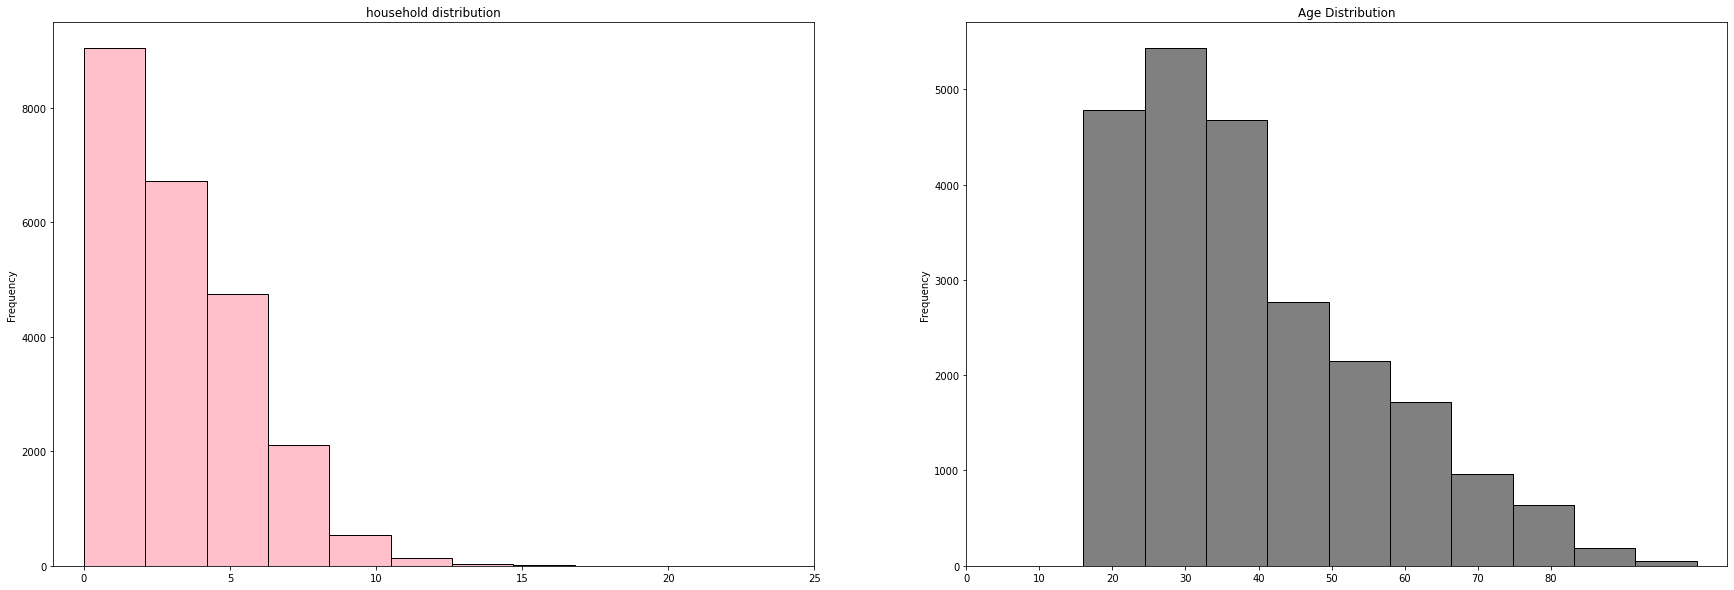

In [ ]:
# Plot a histogram to show the distribution of 
# household size and age in the dataset
fig,ax=plt.subplots(1,2,figsize=(30,10))
Financial['household_size'].plot.hist(ax=ax[0],bins=10,edgecolor='black',color='pink')
ax[0].set_title('household distribution')
x1=list(range(0,30,5))
ax[0].set_xticks(x1)
Financial['Respondent Age'].plot.hist(ax=ax[1],color='grey',bins=10,edgecolor='black')
ax[1].set_title('Age Distribution')
x2=list(range(0,90,10))
ax[1].set_xticks(x2)
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


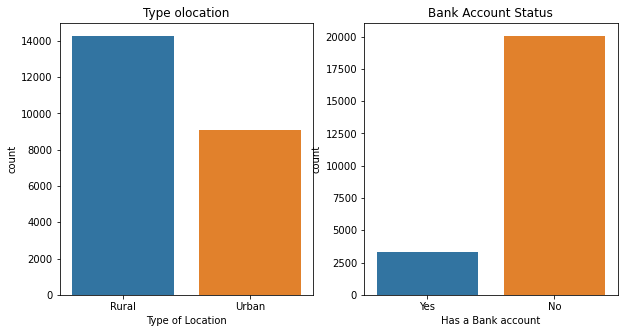

In [ ]:
# plotting  bar charts
# to visualize Type of Location and bank account status
#

fig,ax=plt.subplots(1,2,figsize=(10,5))
sns.countplot('Type of Location',data=Financial,ax=ax[0])
ax[0].set_title('Type olocation')
sns.countplot('Has a Bank account',data=Financial,ax=ax[1])
ax[1].set_title('Bank Account Status')

plt.show()

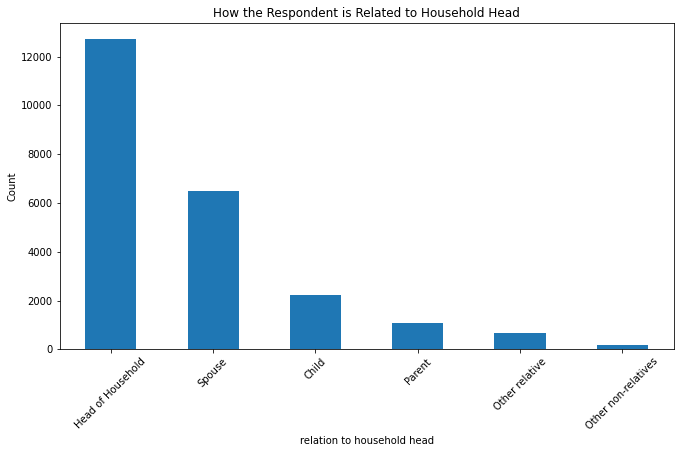

In [ ]:
#Plotting a Bar chart for 'relation to household head' variable
#

Financial['The relathip with head'].value_counts().plot.bar(rot =0,figsize=(11,6))
plt.xlabel("relation to household head")
plt.ylabel("Count")
plt.title("How the Respondent is Related to Household Head")
plt.xticks(rotation = 45)
plt.show()

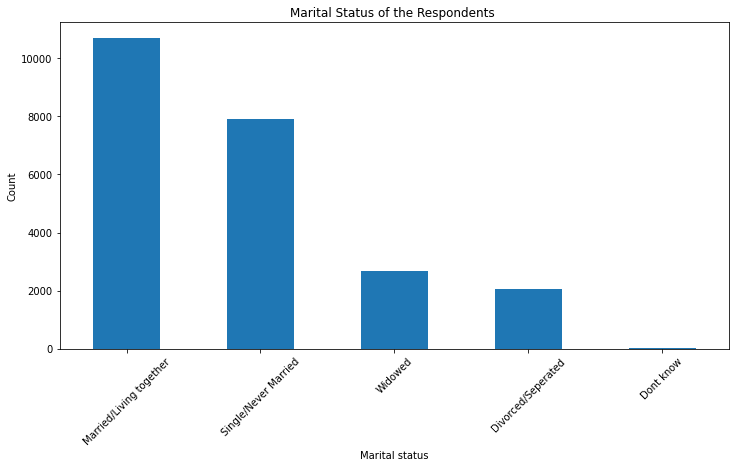

In [ ]:
#Plotting Bar chart for 'marital status' variable
#

Financial['marital_status'].value_counts().plot.bar(rot =0,figsize=(12,6))
plt.xlabel("Marital status")
plt.ylabel("Count")
plt.title("Marital Status of the Respondents ")
plt.xticks(rotation = 45)
plt.show()

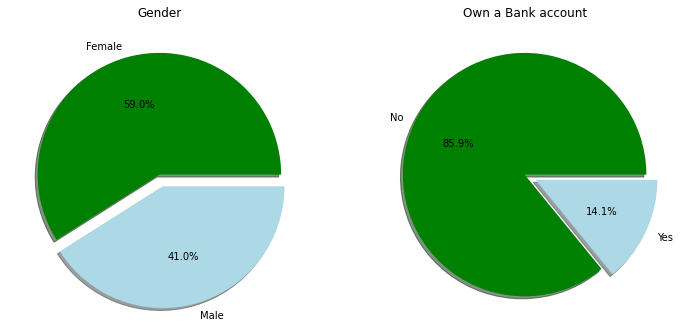

In [ ]:
# Pie chart showing percentage distribution of gender variable
# and 'Has a Bank account' variable
#

fig,ax=plt.subplots(1,2,figsize=(12,6))
colors = ['green', 'lightblue']
Financial['gender_of_respondent'].value_counts().plot.pie(explode=[0,0.1],colors=colors, autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Gender')
ax[0].set_ylabel('')
Financial['Has a Bank account'].value_counts().plot.pie(explode=[0,0.1],colors=colors, autopct='%1.1f%%',ax=ax[1],shadow=True)
ax[1].set_title('Own a Bank account')
ax[1].set_ylabel('')
plt.show()

Measure of Central Tendency

In [ ]:
# Checking the mean, mode and median of hosehold sizes in the dataset
#
mean_householdsize =  Financial['household_size'].mean()
median_householdsize = Financial['household_size'].median()
mode_householdsize = Financial['household_size'].mode()
print(mean_householdsize, median_householdsize, mode_householdsize)

# The mean, median and mode of household size variable are 3, 3 and 2 respectively

3.687588303292375 3.0 0    2.0
dtype: float64


Measures of Dispersion 

In [ ]:
# Checking the various measures of dispersion for the household size variable
# standard deviation, variance, range, interquatile range, skewness and kurtosis

hs_std = Financial['household_size'].std()
hs_var = Financial['household_size'].var()

hs_max = Financial['household_size'].max()
hs_min = Financial['household_size'].min()
hs_range = hs_max - hs_min

hs_skew = Financial['household_size'].skew()
hs_kurt = Financial['household_size'].kurt()

print('Standard Deviation of hs variable is ' + str(hs_std))
print('Variance of hs variable is ' + str(hs_var))
print('Range of hs variable is ' + str(hs_range))
print('Skewness of hs variable is ' + str(hs_skew))
print('Kurtosis of hs variable is ' + str(hs_kurt))

Standard Deviation of hs variable is 2.2809903775845206
Variance of hs variable is 5.202917102633174
Range of hs variable is 21.0
Skewness of hs variable is 0.9747175002958918
Kurtosis of hs variable is 1.1550663154603718


In [ ]:
# Numerical description or Summary of above statistics for household size attribute
#

Financial['household_size'].describe()

count    23357.000000
mean         3.687588
std          2.280990
min          0.000000
25%          2.000000
50%          3.000000
75%          5.000000
max         21.000000
Name: household_size, dtype: float64

In [ ]:
# Numerical description or Summary of above statistics for Respondent Age attribute

Financial['Respondent Age'].describe()

count    23357.000000
mean        38.805326
std         16.521527
min         16.000000
25%         26.000000
50%         35.000000
75%         49.000000
max        100.000000
Name: Respondent Age, dtype: float64

**Bivariate Analysis**

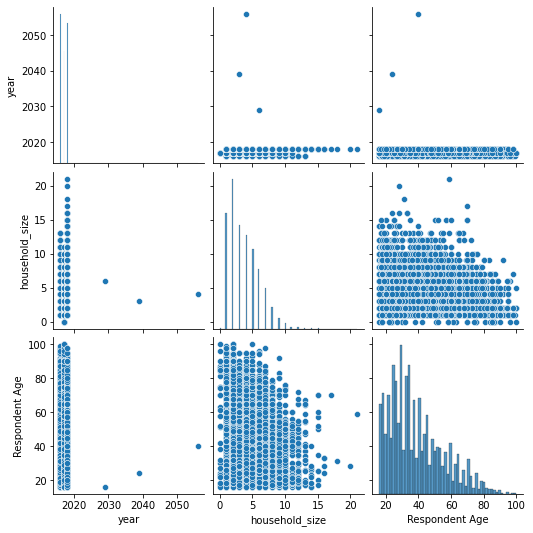

In [ ]:
# Ploting the Bivariate summaries and recording our observations
#crossplots
sns.pairplot(Financial)
plt.show()

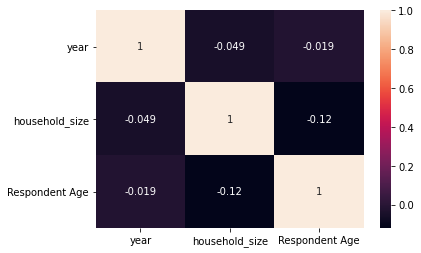

In [ ]:
# Correlation
sns.heatmap(Financial.corr(),annot=True)
plt.show()
# From the heatmap below we can see that three variables are not correlated since they are close to zero.
# The variables with -/+ 0.1 to -/+ 0.3 have weak correlation.
# Three variables have strong correlation since they have +1 . 

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(9.924999999999997, 0.5, 'Household Size')

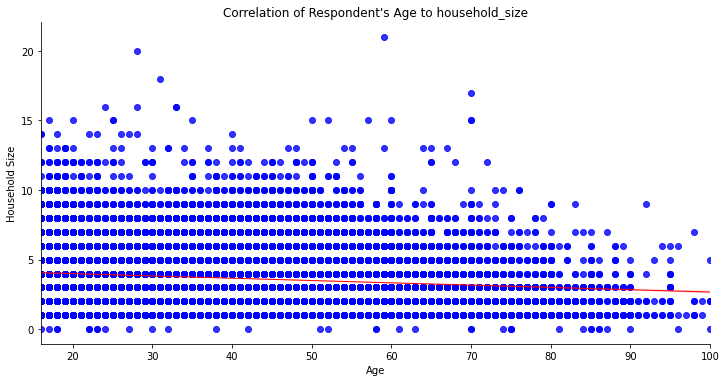

In [ ]:
sns.lmplot('Respondent Age', "household_size", Financial, scatter_kws={'marker':'o', 'color': 'blue'}, 
           line_kws={'linewidth':1,'color':'red'}, height = 5, aspect = 2)

plt.title("Correlation of Respondent's Age to household_size")
plt.xlabel('Age')
plt.ylabel("Household Size")

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


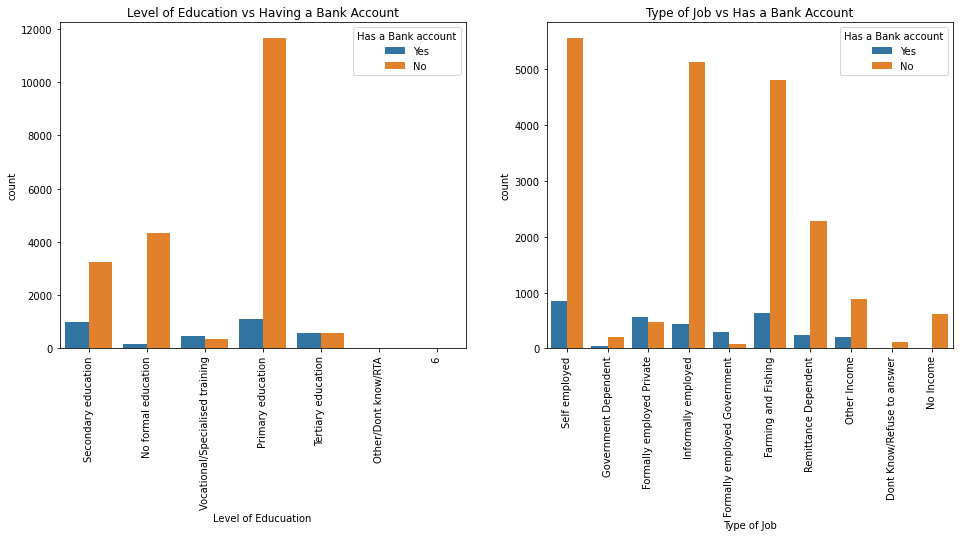

In [ ]:
#Comparing Level of Education and Type of Job vs having a bank account
#

fig,ax=plt.subplots(1,2,figsize=(16,6))

sns.countplot('Level of Educuation',hue='Has a Bank account',data=Financial,ax=ax[0])
ax[0].set_title('Level of Education vs Having a Bank Account')


sns.countplot('Type of Job',hue='Has a Bank account',data=Financial,ax=ax[1])
ax[1].set_title('Type of Job vs Has a Bank Account')

for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=90)


plt.show()
# from the bar graph those in tertiary education are more likely to have bank accounts.
#Formally employed in the Government are more likely to have bank account.

In [17]:
# We are changing the categorical attributes to numeric
# so we can work on some correlations and 
# easier to analyse dataset in multivariate analysis
# to whether a person has a bank account or not
#

encode = {"Has a Bank account": {"Yes":1, "No":0}, "gender_of_respondent": {"Male":1, "Female":0},
          "Cell Phone Access":{"Yes":1,"No":0}, "Type of Location": {"Rural":1, "Urban":0},
          "Level of Educuation":{"No formal education":0,"Primary education":1, "Secondary education":2,
                              "Vocational/Specialised training":3,"Tertiary education":4, "Other/Dont know/RTA":5},
          "The relathip with head":{"Head of Household":0, "Child":1, "Parent":2,
                            "Spouse":3, "Other relative":4, "Other non-relatives":5}, 
          "marital_status":{"Married/Living together":0, "Single/Never Married":1, "Divorced/Seperated":2,
                            "Widowed":3, "Dont know":4}}

In [19]:
#Financial.replace(encode, inplace= True)
Financial.head()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,1.0,1.0,1.0,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,0.0,1.0,0.0,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,1.0,0.0,1.0,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,0.0,1.0,1.0,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,0.0,0.0,0.0,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [21]:
#Correlations between cell phone access and has a bank account.
Financial['Cell Phone Access'].corr(Financial['Has a Bank account'])


0.20953923020526155

In [22]:
#Correlations between cell phone access and has a bank account.
Financial['Type of Location'].corr(Financial['Has a Bank account'])


-0.08808717832179114

In [23]:
#Correlations between cell phone access and has a bank account.
Financial['household_size'].corr(Financial['Has a Bank account'])


-0.022175140726436046

In [24]:
#Correlations between cell phone access and has a bank account.
Financial['Respondent Age'].corr(Financial['Has a Bank account'])


0.019404435761508985

**Multivariate Analysis**

**Principal Component Analysis**

In [25]:
# Step 1: Let's take a look at what our dataset looks like:
#
Financial.head()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,1.0,1.0,1.0,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,0.0,1.0,0.0,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,1.0,0.0,1.0,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,0.0,1.0,1.0,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,0.0,0.0,0.0,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [26]:
#Checking datatypes of our dataset.
Financial.dtypes


country                    object
year                        int64
uniqueid                   object
Has a Bank account        float64
Type of Location          float64
Cell Phone Access         float64
household_size            float64
Respondent Age            float64
gender_of_respondent       object
The relathip with head     object
marital_status             object
Level of Educuation        object
Type of Job                object
dtype: object

In [50]:
#Updating datatypes from string to intergers.
#
Financial["Level of Educuation"] = Financial["Level of Educuation"].astype(str).astype(int, errors='ignore')
Financial['The relathip with head'] = Financial['The relathip with head'].astype(str).astype(int, errors='ignore')
Financial['marital_status'] = Financial['marital_status'].astype(str).astype(int, errors='ignore')

In [51]:
#Confirming datatypes of above changed datatypes
#
Financial.dtypes


country                    object
year                        int64
uniqueid                   object
Has a Bank account        float64
Type of Location          float64
Cell Phone Access         float64
household_size            float64
Respondent Age            float64
gender_of_respondent       object
The relathip with head     object
marital_status             object
Level of Educuation        object
Type of Job                object
dtype: object

In [ ]:
# Step 2: Preprocessing
# The first preprocessing step is to divide the dataset into a feature set and corresponding labels. 
# The following script performs this task. The script below stores the feature sets into the X variable 
# and the series of corresponding labels in to the y variable.
# dropping unnecessary columns

Financial.drop(['country'],axis=1,inplace=True)

In [52]:
Financial.head()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,1.0,1.0,1.0,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,0.0,1.0,0.0,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,1.0,0.0,1.0,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,0.0,1.0,1.0,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,0.0,0.0,0.0,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [53]:
#Dropping unnecessary columns
#
Financial.drop(['gender_of_respondent','The relathip with head','marital_status','Level of Educuation','Type of Job'],axis=1,inplace=True)


In [56]:
Financial.head()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age
0,Kenya,2018,uniqueid_1,1.0,1.0,1.0,3.0,24.0
1,Kenya,2018,uniqueid_2,0.0,1.0,0.0,5.0,70.0
2,Kenya,2018,uniqueid_3,1.0,0.0,1.0,5.0,26.0
3,Kenya,2018,uniqueid_4,0.0,1.0,1.0,5.0,34.0
4,Kenya,2018,uniqueid_5,0.0,0.0,0.0,8.0,26.0


In [57]:
Financial.drop(['country','year','uniqueid'],axis=1,inplace=True)

In [58]:
Financial.head()

,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age
0,1.0,1.0,1.0,3.0,24.0
1,0.0,1.0,0.0,5.0,70.0
2,1.0,0.0,1.0,5.0,26.0
3,0.0,1.0,1.0,5.0,34.0
4,0.0,0.0,0.0,8.0,26.0


In [95]:
#Checking Null values
#
Financial.isnull().values.any()

False

In [76]:
#checking Sum of Null values
#
Financial.isnull().sum().sum()

124

In [92]:
#Removing Null values
# 
Financial.dropna(inplace=True)
Financial.reset_index(drop=True, inplace=True)
Financial

,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age
0,1.0,1.0,1.0,3.0,24.0
1,0.0,1.0,0.0,5.0,70.0
2,1.0,0.0,1.0,5.0,26.0
3,0.0,1.0,1.0,5.0,34.0
4,0.0,0.0,0.0,8.0,26.0
...,...,...,...,...,...
23423,0.0,1.0,1.0,4.0,48.0
23424,0.0,1.0,1.0,2.0,27.0
23425,0.0,1.0,1.0,5.0,27.0
23426,0.0,0.0,1.0,7.0,30.0


In [93]:
# Replacing infinite values with NAN values
#
Financial = Financial.replace([np.inf, -np.inf], np.nan).dropna(axis=0)


In [117]:
#resolve the error - X_test.fillna(X_test.mean()) in PCA
#(in case you want to fill the NaN values by mean of that particular column,
#
np.where(Financial.values >= np.finfo(np.float64).max)

(array([], dtype=int64), array([], dtype=int64))

In [100]:
# Confirming that there are no nulls anymore after the drop
#
Financial.isnull().sum()

Has a Bank account    0
Type of Location      0
Cell Phone Access     0
household_size        0
Respondent Age        0
dtype: int64

In [121]:
#Declaring x and y variables
#
x = Financial.drop('Has a Bank account',1)
y = Financial['Has a Bank account']

In [112]:
#lets check the x variable
#
x.shape


(23524, 4)

In [114]:
#Lets check the y variable
#
y.shape

(23428,)

In [120]:
# Step 3: Splitting the dataset into the Training set and Test set
# The next preprocessing step is to divide data into training and test sets. 
# We execute the following script to do so:
#
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [119]:
# Step 4: Normalization
# PCA performs best with a normalized feature set. 
# We will perform standard scalar normalization to normalize our feature set. 
# To do this, we execute the following code:
# 
from sklearn.preprocessing import StandardScaler

In [122]:
#Step 5: Applying PCA
# It is only a matter of three lines of code to perform PCA using Python's Scikit-Learn library. 
# The PCA class is used for this purpose. PCA depends only upon the feature set and not the label data. 
# Therefore, PCA can be considered as an unsupervised machine learning technique.
# Performing PCA using Scikit-Learn is a two-step process:
# Initialize the PCA class by passing the number of components to the constructor.
# Call the fit and then transform methods by passing the feature set to these methods. 
# The transform method returns the specified number of principal components.
# Let's take a look at the following code. In the code above, we create a PCA object named pca. 
# We did not specify the number of components in the constructor. 
# Hence, all four of the features in the feature set will be returned for both the training and test sets.
# 
from sklearn.decomposition import PCA

pca = PCA()
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)

In [125]:
# Step 6: Explained Variance Ratio
# The PCA class contains explained_variance_ratio_ which returns the variance caused by each of the principal components. 
# We execute the following line of code to find the "explained variance ratio".
# 
explained_variance = pca.explained_variance_ratio_
explained_variance

# The explained_variance variable is now a float type array which contains variance ratios for each principal component. 
# The values for the explained_variance variable looks like what is shown in the output. 
# It can be seen that first principal component is responsible for 98.01% variance. 
# Similarly, the second principal component causes 18.36% variance in the dataset. 
# Collectively we can say that (98.01 + 18.36) 116.37% percent of the classification information contained 
# in the feature set is captured by the first two principal components.

array([9.80186766e-01, 1.83619335e-02, 7.97600904e-04, 6.53699360e-04])

In [128]:
# Step 7: Using 1 Principal Component
# Let's first try to use 1 principal component to train our algorithm. To do so, execute the following code:
# 
from sklearn.decomposition import PCA

pca = PCA(n_components=1)
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)

In [129]:
# Step 8: Training and Making Predictions
# In this case we'll use random forest classification for making the predictions.
# 
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(x_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(x_test)

In [130]:
# Step 9: Performance Evaluation
# 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' , accuracy_score(y_test, y_pred))

# Noting that from the output that with only one feature, 
# the random forest algorithm is able to correctly predict 4025 out of 4686 instances, 
# resulting in 85.89% accuracy.

[[4025    0]
 [ 661    0]]
Accuracy 0.8589415279556125


In [132]:
# Step 10: Results with 2 Principal Components
# Now let's try to evaluate classification performance of the random forest algorithm 
# with 2 principal components. 
#
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)

# Here the number of components for PCA has been set to 2. 


ValueError: ignored

In [133]:
# Step 11: Results with 2 Principal Components
# Lets now write code to evaluate clasification performance of the 
# random forest algorithm with 3 principal components.
#
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

pca = PCA(n_components=3)
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)

# With three principal components the classification accuracy should again increase to 93.33%
classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=2, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [135]:
# Predicting the Test set results
#
y_pred = classifier.predict(x_test)

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' , accuracy_score(y_test, y_pred))
# Test results have an accuracy of 85.89%

[[4025    0]
 [ 661    0]]
Accuracy 0.8589415279556125


**Factor Analysis**

In [136]:
# Step 1: Previewing the dataset columns
# 
Financial.columns

Index(['Has a Bank account', 'Type of Location', 'Cell Phone Access',
       'household_size', 'Respondent Age'],
      dtype='object')

In [137]:
# Step 2: Dropping missing values rows
#
Financial.dropna(inplace=True)

In [138]:
# Step 3: Checking the datatypes
# 
Financial.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23428 entries, 0 to 23427
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Has a Bank account  23428 non-null  float64
 1   Type of Location    23428 non-null  float64
 2   Cell Phone Access   23428 non-null  float64
 3   household_size      23428 non-null  float64
 4   Respondent Age      23428 non-null  float64
dtypes: float64(5)
memory usage: 1.1 MB


In [139]:
# Step 4: Previewing our dataset
# 
Financial.head()

,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age
0,1.0,1.0,1.0,3.0,24.0
1,0.0,1.0,0.0,5.0,70.0
2,1.0,0.0,1.0,5.0,26.0
3,0.0,1.0,1.0,5.0,34.0
4,0.0,0.0,0.0,8.0,26.0


In [143]:
# Step 5: Adequacy Test
# Before we perform factor analysis,we need to evaluate the “factorability” of our dataset. 
# Factorability means "can we found the factors in the dataset?". 
# There are two methods to check the factorability or sampling adequacy:
# - Bartlett’s Test
# - Kaiser-Meyer-Olkin Test
# ---
# Bartlett’s test of sphericity checks whether or not the observed variables intercorrelate at all 
# using the observed correlation matrix against the identity matrix. If the test found statistically insignificant, 
# we should not employ a factor analysis.
# ---

# Installing factor analyzer 
!pip install factor_analyzer==0.2.3

from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity

chi_square_value,p_value=calculate_bartlett_sphericity(Financial)
chi_square_value, p_value

# In Bartlett ’s test, the p-value is 0. The test was statistically significant, 
# indicating that the observed correlation matrix is not an identity matrix.2

(4275.598087719762, 0.0)

In [145]:
# Step 6:
# Kaiser-Meyer-Olkin (KMO) Test measures the suitability of data for factor analysis. 
# It determines the adequacy for each observed variable and for the complete model. 
# KMO estimates the proportion of variance among all the observed variable. 
# Lower proportion id more suitable for factor analysis. KMO values range between 0 and 1. 
# Value of KMO less than 0.6 is considered inadequate.
# 
from factor_analyzer.factor_analyzer import calculate_kmo

kmo_all,kmo_model=calculate_kmo(Financial)
kmo_all,kmo_model

# The overall KMO for our data is 0.48, which is excellent. 
# is inadequate since is below 0.6
# This value indicates that i cant  proceed with planned factor analysis.

(                         KMO
 Has a Bank account  0.455643
 Type of Location    0.472767
 Cell Phone Access   0.494225
 household_size      0.508374
 Respondent Age      0.412532, 0.47841220532982437)

**Discriminant Analysis**

In [147]:
# Step 1: Once dataset is loaded into a pandas data frame object, the first step is to divide dataset 
# into features and corresponding labels and then divide the resultant dataset into training and test sets. 
# The following code divides data into labels and feature set. 
# The code assigns the first four columns of the dataset i.e. the feature set to X variable 
# while the values in the fifth column (labels) are assigned to the y variable.
#
X = Financial.iloc[:, 0:4].values
y = Financial.iloc[:, 4].values

In [148]:
# Step 2: The following code divides data into training and test sets
#
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [149]:
# Step 3: Feature scaling
# We now need to perform feature scaling. We execute the following code to do so:
# 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [150]:
# Step 4: Peforming LDA
# It requires only four lines of code to perform LDA with Scikit-Learn. 
# The LinearDiscriminantAnalysis class of the sklearn.discriminant_analysis 
# library can be used to Perform LDA in Python. 
# Let's take a look at the following code
#

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=1)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)
# In the script above the LinearDiscriminantAnalysis class is imported as LDA. 
# We have to pass the value for the n_components parameter of the LDA, 
# which refers to the number of linear discriminates that we want to retrieve. 
# In this case we set the n_components to 1, since we first want to check the performance 
# of our classifier with a single linear discriminant. 
# Finally we execute the fit and transform methods to actually retrieve the linear discriminants.
# Notice, in case of LDA, the transform method takes two parameters: the X_train and the y_train. 
# This reflects the fact that LDA takes the output class labels into account while selecting the linear discriminants.

In [154]:
# Step 5: Training and Making Predictions
# We will use the random forest classifier to evaluate the performance of a PCA-reduced algorithms as shown
# 

from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [153]:
# Step 6: Evaluating the Performance
# As always, the last step is to evaluate performance of the algorithm 
# with the help of a confusion matrix and find the accuracy of the prediction.
# 

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' + str(accuracy_score(y_test, y_pred)))

# We can see that with one linear discriminant, the algorithm achieved an accuracy of 44.6%, 
# which is greater than the accuracy achieved with one principal component, which was 44.6%.

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Accuracy0.04460093896713615


## 7. Implementing the Solution

From the research project, concluded that:

1. Persons who are in tertiary education are more likely to have bank accounts.

2. Individuals who are formally employed in the Government are more likely to have bank account.

3. There is a high correction with phone access and having bank account, individuals with access to phone are likely or have bank account.

## 9. Follow up questions

The data was resoucerful and adequate for the research.

